In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
def train_model(model, epochs, batch_size):
    model.fit(test_images, test_labels, epochs=epochs, batch_size=batch_size)

In [7]:
epochs_list = [5, 10, 15]
batch_list = [32, 64, 128]

In [8]:
for epochs in epochs_list:
    for batch_size in batch_list:
        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(10, activation='softmax')
        ])
        
        model.compile(optimizer = 'adam',
                      loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics = ['accuracy'])
        
        train_model(model, epochs, batch_size)
        print('*' * 100)
        model.evaluate(test_images, test_labels)
        print('*' * 100)

2022-11-23 09:14:00.241343: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-23 09:14:00.586938: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
313/313 [==============================] - 1s 3ms/step - loss: 0.7353 - accuracy: 0.7443
Epoch 2/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5106 - accuracy: 0.8176
Epoch 3/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4590 - accuracy: 0.8376
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 0.4291 - accuracy: 0.8440
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3997 - accuracy: 0.8560
****************************************************************************************************
313/313 [==============================] - 1s 2ms/step - loss: 0.3766 - accuracy: 0.8612
****************************************************************************************************
Epoch 1/5
157/157 [==============================] - 1s 3ms/step - loss: 0.8196 - accuracy: 0.7169
Epoch 2/5
157/157 [==============================] - 1s 4ms/step - loss: 0.5348 - accuracy: 0.8178
Epoch 3/5
157/15

### Dropout

In [9]:
for epochs in epochs_list:
    for batch_size in batch_list:
        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(56, activation='elu'),
            keras.layers.Dense(108, activation='relu'),
            keras.layers.Dropout(0.15),
            keras.layers.Dense(10, activation='softmax')
        ])
        
        model.compile(optimizer = 'adam',
                      loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics = ['accuracy'])
        
        train_model(model, epochs, batch_size)
        print('*' * 100)
        model.evaluate(test_images, test_labels)
        print('*' * 100)

Epoch 1/5
313/313 [==============================] - 2s 4ms/step - loss: 0.8097 - accuracy: 0.7097
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 0.5368 - accuracy: 0.8063
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 0.4839 - accuracy: 0.8257
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 0.4295 - accuracy: 0.8422
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.4043 - accuracy: 0.8509
****************************************************************************************************
313/313 [==============================] - 1s 3ms/step - loss: 0.3626 - accuracy: 0.8631
****************************************************************************************************
Epoch 1/5
157/157 [==============================] - 1s 5ms/step - loss: 0.8613 - accuracy: 0.6923
Epoch 2/5
157/157 [==============================] - 1s 5ms/step - loss: 0.5535 - accuracy: 0.8040
Epoch 3/5
157/15

### BatchNormalization

In [10]:
for epochs in epochs_list:
    for batch_size in batch_list:
        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.Dense(56, activation='elu'),
            keras.layers.Dense(108, activation='relu'),
            keras.layers.Dense(10, activation='softmax')
        ])
        
        model.compile(optimizer = 'adam',
                      loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics = ['accuracy'])
        
        train_model(model, epochs, batch_size)
        print('*' * 100)
        model.evaluate(test_images, test_labels)
        print('*' * 100)

Epoch 1/5
313/313 [==============================] - 2s 5ms/step - loss: 0.6643 - accuracy: 0.7676
Epoch 2/5
313/313 [==============================] - 1s 5ms/step - loss: 0.4815 - accuracy: 0.8266
Epoch 3/5
313/313 [==============================] - 1s 5ms/step - loss: 0.4393 - accuracy: 0.8369
Epoch 4/5
313/313 [==============================] - 1s 5ms/step - loss: 0.4037 - accuracy: 0.8486
Epoch 5/5
313/313 [==============================] - 1s 5ms/step - loss: 0.3884 - accuracy: 0.8550
****************************************************************************************************
313/313 [==============================] - 1s 3ms/step - loss: 0.4387 - accuracy: 0.8372
****************************************************************************************************
Epoch 1/5
157/157 [==============================] - 1s 5ms/step - loss: 0.6777 - accuracy: 0.7681
Epoch 2/5
157/157 [==============================] - 1s 5ms/step - loss: 0.4687 - accuracy: 0.8277
Epoch 3/5
157/15

### LayerNormalization

In [11]:
for epochs in epochs_list:
    for batch_size in batch_list:
        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.LayerNormalization(),
            keras.layers.Dense(56, activation='elu'),
            keras.layers.Dense(108, activation='relu'),
            keras.layers.Dense(10, activation='softmax')
        ])
        
        model.compile(optimizer = 'adam',
                      loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics = ['accuracy'])
        
        train_model(model, epochs, batch_size)
        print('*' * 100)
        model.evaluate(test_images, test_labels)
        print('*' * 100)

Epoch 1/5
313/313 [==============================] - 2s 5ms/step - loss: 0.6845 - accuracy: 0.7468
Epoch 2/5
313/313 [==============================] - 2s 5ms/step - loss: 0.4883 - accuracy: 0.8190
Epoch 3/5
313/313 [==============================] - 2s 5ms/step - loss: 0.4387 - accuracy: 0.8377
Epoch 4/5
313/313 [==============================] - 2s 5ms/step - loss: 0.3914 - accuracy: 0.8548
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.3747 - accuracy: 0.8591
****************************************************************************************************
313/313 [==============================] - 1s 3ms/step - loss: 0.3201 - accuracy: 0.8844
****************************************************************************************************
Epoch 1/5
157/157 [==============================] - 1s 6ms/step - loss: 0.7508 - accuracy: 0.7309
Epoch 2/5
157/157 [==============================] - 1s 6ms/step - loss: 0.4874 - accuracy: 0.8221
Epoch 3/5
157/15

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(56, activation='elu'),
    keras.layers.Dense(108, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
        
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.fit(test_images, test_labels, epochs=15, batch_size=32)

Epoch 1/15
313/313 [==============================] - 2s 5ms/step - loss: 0.6700 - accuracy: 0.7531
Epoch 2/15
313/313 [==============================] - 2s 5ms/step - loss: 0.4818 - accuracy: 0.8242
Epoch 3/15
313/313 [==============================] - 2s 5ms/step - loss: 0.4284 - accuracy: 0.8410
Epoch 4/15
313/313 [==============================] - 2s 5ms/step - loss: 0.3870 - accuracy: 0.8545
Epoch 5/15
313/313 [==============================] - 2s 5ms/step - loss: 0.3583 - accuracy: 0.8653
Epoch 6/15
313/313 [==============================] - 2s 5ms/step - loss: 0.3490 - accuracy: 0.8722
Epoch 7/15
313/313 [==============================] - 2s 5ms/step - loss: 0.3253 - accuracy: 0.8767
Epoch 8/15
313/313 [==============================] - 2s 5ms/step - loss: 0.3036 - accuracy: 0.8854
Epoch 9/15
313/313 [==============================] - 2s 5ms/step - loss: 0.2886 - accuracy: 0.8925
Epoch 10/15
313/313 [==============================] - 2s 5ms/step - loss: 0.2771 - accuracy: 0.8963

In [13]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1820 - accuracy: 0.9322


[0.18199796974658966, 0.932200014591217]

In [14]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [15]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100 * np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

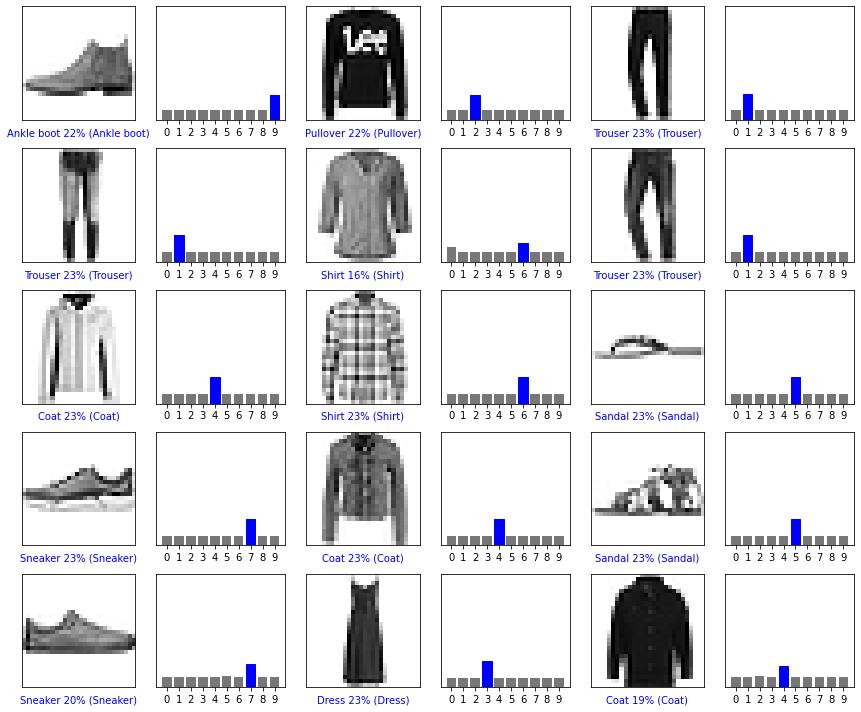

In [16]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()